In [53]:
from velovi import preprocess_data

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
Created a temporary directory at /tmp/tmphbsg8_e5
Writing /tmp/tmphbsg8_e5/_remote_module_non_scriptable.py
Global seed set to 0
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_de

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scvelo as scv
import RegVelo as rgv

In [2]:
scv.set_figure_params()

In [203]:
adata = sc.read_h5ad("/home/icb/weixu.wang/regulatory_velo/simulate_dataset/dataset2.h5ad")

In [204]:
adata

AnnData object with n_obs × n_vars = 1000 × 210
    obs: 'step_ix', 'simulation_i', 'sim_time'
    var: 'module_id', 'basal', 'burn', 'independence', 'color', 'is_tf', 'is_hk', 'transcription_rate', 'splicing_rate', 'translation_rate', 'mrna_halflife', 'protein_halflife', 'mrna_decay_rate', 'protein_decay_rate', 'max_premrna', 'max_mrna', 'max_protein', 'mol_premrna', 'mol_mrna', 'mol_protein'
    uns: 'network', 'network_feature_id', 'skeleton', 'traj_dimred_segments', 'traj_milestone_network', 'traj_progressions'
    obsm: 'dimred'
    layers: 'counts_protein', 'counts_spliced', 'counts_unspliced', 'logcounts', 'rna_velocity'

In [205]:
adata.X = adata.X.copy()
adata.layers["spliced"] = adata.layers["counts_spliced"].copy()
adata.layers["unspliced"] = adata.layers["counts_unspliced"].copy()

In [206]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [207]:
scv.pp.filter_and_normalize(adata, min_shared_counts=5, n_top_genes=210)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 35 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [208]:
adata.X = np.log1p(adata.X.copy())

In [209]:
### prove that RegVelo won't work if extract Burn-TF
list = ['Burn1_TF1', 'Burn1_TF2', 'Burn2_TF1', 'Burn2_TF2', 'Burn3_TF1',
       'Burn3_TF2', 'Burn4_TF1', 'Burn4_TF2','A1_TF1', 'A1_TF2', 'A2_TF1', 'A2_TF2', 'A3_TF1', 'A3_TF2',
       'A3_TF3', 'A4_TF1', 'A4_TF2', 'A5_TF1', 'A5_TF2']
list2 = ['Target42','Target43', 'Target46', 'Target47','Target1', 'Target2', 'Target11','Target15', 'Target17', 'Target19']
adata = adata[:,[i not in list2+list for i in adata.var.index.values]]

In [154]:
adata = preprocess_data(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [210]:
adata.shape

(1000, 146)

In [211]:
W = adata.uns["skeleton"].copy()

In [212]:
features = [i in adata.var.index.values for i in adata.uns["network_feature_id"]]
W = W[features,:]
W = W[:,features]

In [213]:
features = [i not in adata.var.index.values for i in adata.uns["network_feature_id"]]

In [214]:
adata.uns["network_feature_id"][features]

array(['Burn1_TF1', 'Burn1_TF2', 'Burn2_TF1', 'Burn2_TF2', 'Burn3_TF1',
       'Burn3_TF2', 'Burn4_TF1', 'Burn4_TF2', 'A1_TF1', 'A1_TF2',
       'A2_TF1', 'A2_TF2', 'A3_TF1', 'A3_TF2', 'A3_TF3', 'A4_TF1',
       'A4_TF2', 'A5_TF1', 'A5_TF2', 'Target1', 'Target2', 'Target11',
       'Target15', 'Target17', 'Target19', 'Target20', 'Target42',
       'Target43', 'Target46', 'Target47', 'HK1', 'HK2', 'HK3', 'HK5',
       'HK6', 'HK10', 'HK14', 'HK19', 'HK21', 'HK24', 'HK27', 'HK28',
       'HK29', 'HK34', 'HK39', 'HK40', 'HK43', 'HK44', 'HK45', 'HK46',
       'HK47', 'HK49', 'HK50', 'HK54', 'HK55', 'HK58', 'HK61', 'HK64',
       'HK65', 'HK69', 'HK70', 'HK73', 'HK75', 'HK79'], dtype=object)

In [215]:
features = [i in adata.var.index.values for i in adata.uns["network_feature_id"]]

In [216]:
adata.uns["network_feature_id"][features]

array(['A6_TF1', 'A6_TF2', 'A6_TF3', 'B1_TF1', 'B1_TF2', 'B2_TF1',
       'B2_TF2', 'B3_TF1', 'B3_TF2', 'B3_TF3', 'B4_TF1', 'B4_TF2',
       'B5_TF1', 'B5_TF2', 'B6_TF1', 'B6_TF2', 'B6_TF3', 'B7_TF1',
       'B7_TF2', 'B7_TF3', 'B8_TF1', 'B8_TF2', 'B9_TF1', 'B9_TF2',
       'B10_TF1', 'B10_TF2', 'B10_TF3', 'B11_TF1', 'B11_TF2', 'B12_TF1',
       'B12_TF2', 'B13_TF1', 'B13_TF2', 'B14_TF1', 'B14_TF2', 'C1_TF1',
       'C1_TF2', 'C1_TF3', 'C2_TF1', 'C2_TF2', 'C3_TF1', 'C3_TF2',
       'C3_TF3', 'C4_TF1', 'C4_TF2', 'C5_TF1', 'C5_TF2', 'C5_TF3',
       'D1_TF1', 'D1_TF2', 'D2_TF1', 'D2_TF2', 'D3_TF1', 'D3_TF2',
       'D4_TF1', 'D4_TF2', 'D4_TF3', 'D5_TF1', 'D5_TF2', 'D6_TF1',
       'D6_TF2', 'Target3', 'Target4', 'Target5', 'Target6', 'Target7',
       'Target8', 'Target9', 'Target10', 'Target12', 'Target13',
       'Target14', 'Target16', 'Target18', 'Target21', 'Target22',
       'Target23', 'Target24', 'Target25', 'Target26', 'Target27',
       'Target28', 'Target29', 'Target30', 'Targ

In [217]:
import torch
W = torch.tensor(W).int()

In [218]:
W.shape

torch.Size([146, 146])

In [219]:
rgv_m = rgv.train.Trainer(adata, loss_mode='mse',W=W.T, early_stopping = False, nepoch = 400, n_latent = 20)

In [220]:
rgv_m.train()

Epoch 400: 100%|██████████| 400/400 [06:52<00:00,  1.03s/epoch, train_loss=207, val_loss=196]


In [221]:
adata.obs["sim_time"]

cell1       348.083333
cell2       402.083333
cell3       256.000000
cell4       374.083333
cell5       644.000000
               ...    
cell996     348.083333
cell997      56.000000
cell998     250.000000
cell999     180.000000
cell1000    184.000000
Name: sim_time, Length: 1000, dtype: float64

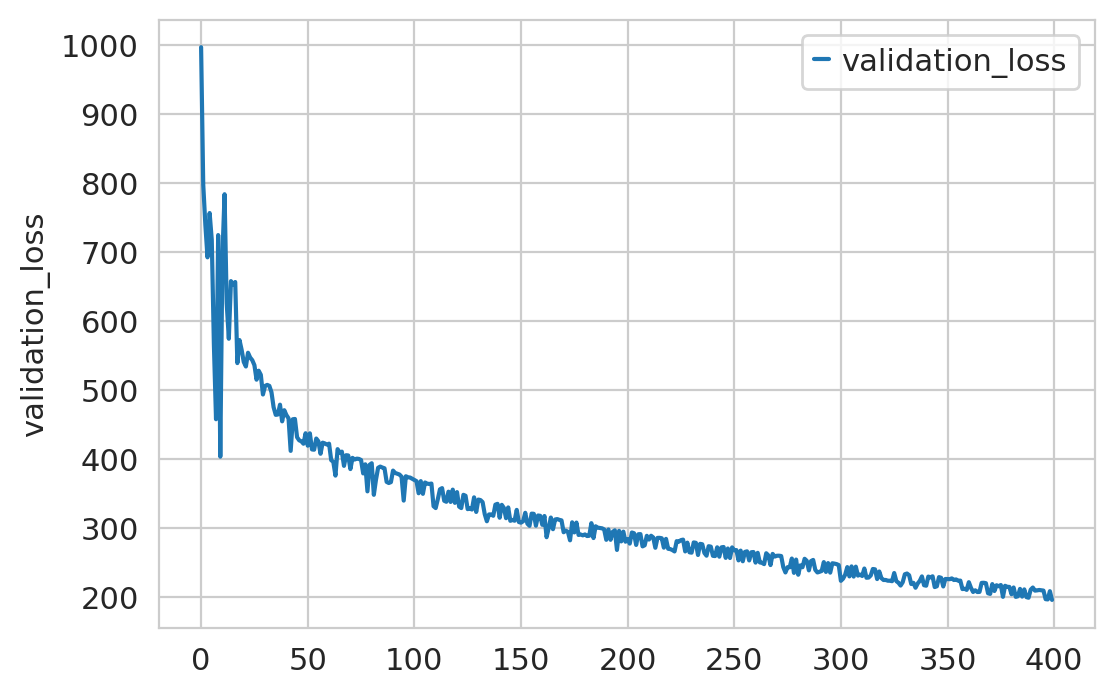

In [222]:
tnode.log['validation_loss']
fig, ax = plt.subplots()
ax.plot(tnode.log['validation_loss'], label="validation_loss")
ax.set_ylabel("validation_loss")
ax.legend()
plt.show()

In [223]:
adata.obs["ptime"] = rgv_m.get_time()

In [224]:
adata.obs['ptime'].max()

5.567109

<AxesSubplot: ylabel='Density'>

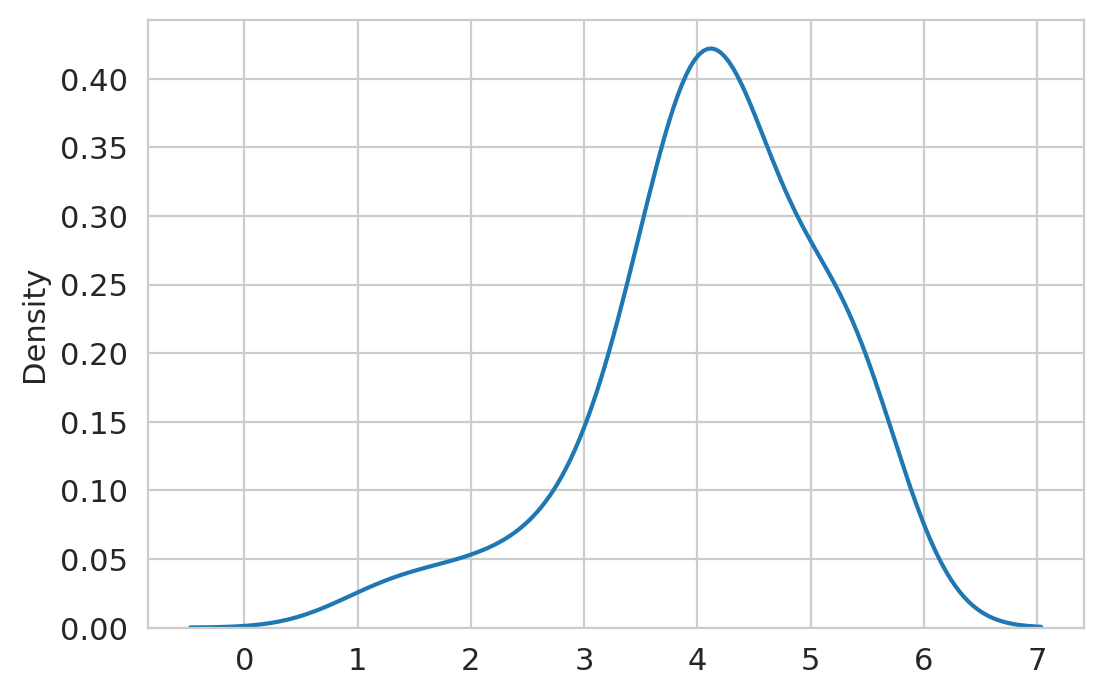

In [225]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(adata.obs['ptime'].values), bw=0.5)

In [226]:
from typing import Optional
from sctour._utils import get_step_size
from torchdiffeq import odeint
def get_vector_field(
    self,
    T: np.ndarray,
    model: Optional[str] = None,
    sim_dynamics: bool = False,
) -> np.ndarray:
    """
    Get the vector field.

    Parameters
    ----------
    T
        The estimated pseudotime for each cell.
    Z
        The latent representation for each cell.
    model
        The model used to get the vector field. Only provided when using the saved model.

    Returns
    ----------
    :class:`~numpy.ndarray`
        The estimated vector field.
    """

    model = self._get_model(model)
    model.eval()
    Z = np.concatenate([self.adata.layers["Mu"],self.adata.layers["Ms"]],axis = 1)
    if not (isinstance(T, np.ndarray) and isinstance(Z, np.ndarray)):
        raise TypeError('The inputs must be numpy arrays.')
    Z = torch.tensor(Z).to(self.device)
    T = torch.tensor(T).to(self.device)
    #index = torch.argsort(T)
    #T = T[index]
    #Z = Z[index]

    #if self.time_reverse is None:
    #    raise RuntimeError('It seems you did not run get_time() function first. Please run get_time() before you run get_vector_field().')
    #direction = 1
    #if self.time_reverse:
    #    direction = -1
    velo = model.lode_func(T, Z).cpu().detach().numpy()

    if sim_dynamics:
        id = adata.obs.index.values
        ## simulate the system to generate the dynamics of all cells
        T = T.ravel()  ## odeint requires 1-D Tensor for time
        index = torch.argsort(T)
        T = T[index]
        Z = Z[index]
        id = id[index.cpu().numpy()]
        index2 = (T[:-1] != T[1:])
        index2 = torch.cat((index2, torch.tensor([True]).to(index2.device))) ## index2 is used to get unique time points as odeint requires strictly increasing/decreasing time points
        T = T[index2]   
        Z = Z[index2]
        id = id[index2.cpu().numpy()]

        ## generate dynamics through ODE solver
        Z0 = Z[0]
        options = get_step_size(model.step_size, T[0], T[-1], len(T))
        pred_x = odeint(model.lode_func, Z0.to(model.device), T.to(model.device), method = model.ode_method, options = options).view(-1, model.n_int)
        pred_x = pred_x.to(Z.device)
        
        new_velo = model.lode_func(T, pred_x).cpu().detach().numpy()
        
        ## insert into the velocity matrix
        insert = [adata.obs.index.tolist().index(i) for i in id]
        for i in insert:
            velo[i,:] = new_velo[i,:]

    return velo

In [227]:
velocity = get_vector_field(rgv_m,T=adata.obs['ptime'].values)

In [228]:
velocity = torch.tensor(velocity)

In [229]:
ds = velocity[:,int(rgv_m.n_int/2):rgv_m.n_int]

In [230]:
ds.shape

torch.Size([1000, 146])

In [231]:
adata.layers["velocity"] = ds

In [232]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/80 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


Renamed 'dimred' to convention 'X_dimred' (adata.obsm).
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_dimred', embedded velocity vectors (adata.obsm)


/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


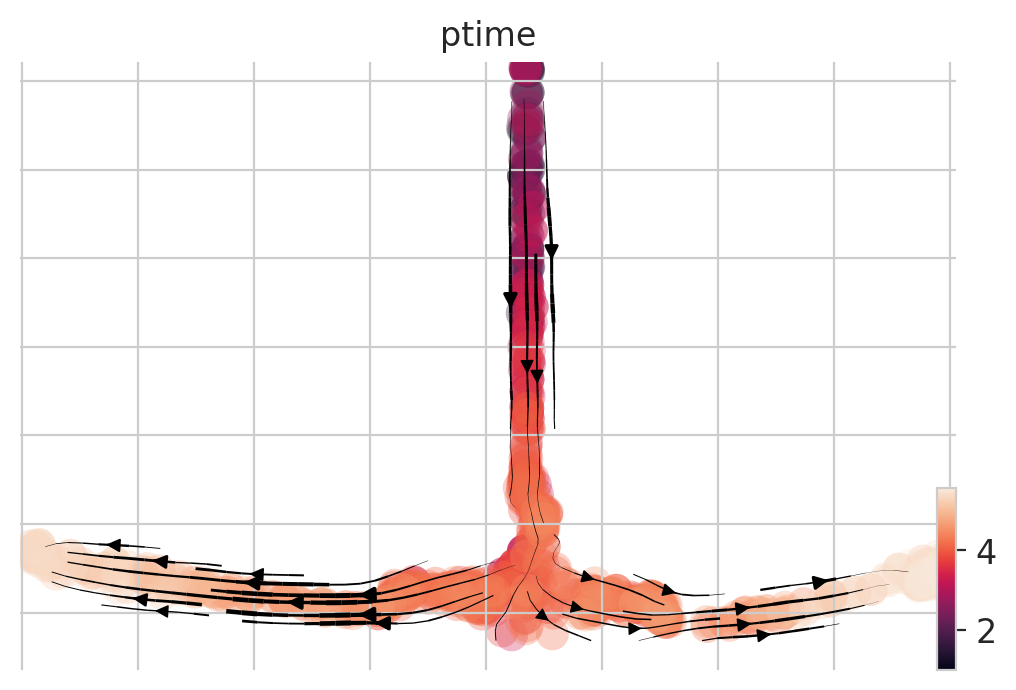

In [233]:
scv.pl.velocity_embedding_stream(adata, basis='dimred',color = 'ptime')

In [283]:
#velocity_random = tnode2.get_vector_field(adata.obs['ptime'].values)
velocity = get_vector_field(tnode,adata.obs['ptime'].values)
#ds_random = velocity_random[:,int(tnode2.n_int/2):tnode2.n_int]
ds = velocity[:,int(tnode.n_int/2):tnode.n_int]
velocity_gt = adata.layers["rna_velocity"]

In [284]:
import scipy
corr = scipy.stats.spearmanr(velocity_gt.todense(), ds)
corr = np.diagonal(corr.statistic[0:146,146:(146*2)])

In [285]:
corr.mean()

0.1085889053636463

In [269]:
from velovi import VELOVI

In [271]:
adata.var["velocity_genes"] = True

In [272]:
VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
vae = VELOVI(adata)

In [273]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/500:   0%|          | 0/500 [00:00<?, ?it/s]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 3/500:   0%|          | 2/500 [00:11<39:34,  4.77s/it, loss=518, v_num=1]  

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 4/500:   1%|          | 3/500 [00:11<21:54,  2.64s/it, loss=470, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 6/500:   1%|          | 5/500 [00:11<09:05,  1.10s/it, loss=406, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 9/500:   2%|▏         | 8/500 [00:12<04:32,  1.81it/s, loss=267, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 12/500:   2%|▏         | 11/500 [00:12<01:53,  4.32it/s, loss=196, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 15/500:   3%|▎         | 14/500 [00:12<01:26,  5.59it/s, loss=142, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 18/500:   3%|▎         | 17/500 [00:12<01:01,  7.91it/s, loss=99.7, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 20/500:   4%|▍         | 19/500 [00:13<00:55,  8.66it/s, loss=74.4, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 23/500:   4%|▍         | 22/500 [00:13<00:51,  9.30it/s, loss=39.2, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 25/500:   5%|▍         | 24/500 [00:13<00:48,  9.76it/s, loss=18.7, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 28/500:   5%|▌         | 27/500 [00:13<00:44, 10.60it/s, loss=-6.85, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 30/500:   6%|▌         | 29/500 [00:14<00:42, 10.97it/s, loss=-20.9, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 33/500:   6%|▋         | 32/500 [00:14<00:41, 11.31it/s, loss=-37.3, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 35/500:   7%|▋         | 35/500 [00:14<00:39, 11.82it/s, loss=-45.9, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 38/500:   7%|▋         | 37/500 [00:14<00:38, 11.89it/s, loss=-58, v_num=1]  

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 40/500:   8%|▊         | 39/500 [00:14<00:39, 11.79it/s, loss=-65.1, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 43/500:   8%|▊         | 42/500 [00:15<00:38, 11.75it/s, loss=-75.2, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 45/500:   9%|▉         | 45/500 [00:15<00:37, 12.02it/s, loss=-84.4, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 48/500:   9%|▉         | 47/500 [00:15<00:37, 12.14it/s, loss=-90.3, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 51/500:  10%|█         | 50/500 [00:15<00:37, 12.10it/s, loss=-99.8, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 54/500:  11%|█         | 53/500 [00:16<00:37, 11.95it/s, loss=-109, v_num=1] 

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 57/500:  11%|█         | 56/500 [00:16<00:37, 11.87it/s, loss=-118, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 60/500:  12%|█▏        | 59/500 [00:16<00:37, 11.80it/s, loss=-127, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 63/500:  12%|█▏        | 62/500 [00:16<00:36, 11.86it/s, loss=-134, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 65/500:  13%|█▎        | 64/500 [00:16<00:36, 11.88it/s, loss=-138, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 67/500:  13%|█▎        | 66/500 [00:17<00:36, 11.78it/s, loss=-143, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 70/500:  14%|█▍        | 69/500 [00:17<00:40, 10.66it/s, loss=-150, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 72/500:  14%|█▍        | 71/500 [00:17<00:43,  9.75it/s, loss=-155, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 74/500:  15%|█▍        | 73/500 [00:17<00:50,  8.52it/s, loss=-157, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 76/500:  15%|█▌        | 75/500 [00:18<00:51,  8.33it/s, loss=-158, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 79/500:  16%|█▌        | 78/500 [00:18<00:47,  8.87it/s, loss=-163, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 81/500:  16%|█▌        | 80/500 [00:18<00:42,  9.96it/s, loss=-168, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 83/500:  16%|█▋        | 82/500 [00:19<00:47,  8.85it/s, loss=-172, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 85/500:  17%|█▋        | 84/500 [00:19<00:51,  8.09it/s, loss=-177, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 86/500:  17%|█▋        | 85/500 [00:19<00:51,  8.09it/s, loss=-179, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 88/500:  18%|█▊        | 88/500 [00:19<00:47,  8.72it/s, loss=-183, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 90/500:  18%|█▊        | 89/500 [00:19<00:48,  8.39it/s, loss=-186, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 93/500:  18%|█▊        | 92/500 [00:20<00:42,  9.55it/s, loss=-191, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 95/500:  19%|█▉        | 94/500 [00:20<00:39, 10.19it/s, loss=-194, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 98/500:  19%|█▉        | 97/500 [00:20<00:38, 10.56it/s, loss=-199, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 100/500:  20%|█▉        | 99/500 [00:20<00:37, 10.79it/s, loss=-202, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 103/500:  20%|██        | 102/500 [00:21<00:35, 11.16it/s, loss=-204, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 105/500:  21%|██        | 104/500 [00:21<00:35, 11.24it/s, loss=-207, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 108/500:  21%|██▏       | 107/500 [00:21<00:34, 11.27it/s, loss=-213, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 110/500:  22%|██▏       | 109/500 [00:21<00:34, 11.29it/s, loss=-216, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 113/500:  22%|██▏       | 112/500 [00:21<00:34, 11.33it/s, loss=-218, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 115/500:  23%|██▎       | 114/500 [00:22<00:34, 11.29it/s, loss=-220, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 118/500:  23%|██▎       | 117/500 [00:22<00:33, 11.27it/s, loss=-224, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 120/500:  24%|██▍       | 119/500 [00:22<00:33, 11.29it/s, loss=-226, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 123/500:  24%|██▍       | 122/500 [00:22<00:33, 11.34it/s, loss=-228, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 125/500:  25%|██▍       | 124/500 [00:22<00:33, 11.36it/s, loss=-231, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 128/500:  25%|██▌       | 127/500 [00:23<00:32, 11.34it/s, loss=-235, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 130/500:  26%|██▌       | 129/500 [00:23<00:32, 11.34it/s, loss=-238, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 133/500:  26%|██▋       | 132/500 [00:23<00:32, 11.36it/s, loss=-240, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 135/500:  27%|██▋       | 134/500 [00:23<00:32, 11.35it/s, loss=-240, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 138/500:  27%|██▋       | 137/500 [00:24<00:32, 11.33it/s, loss=-242, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 140/500:  28%|██▊       | 139/500 [00:24<00:31, 11.31it/s, loss=-245, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 143/500:  28%|██▊       | 142/500 [00:24<00:31, 11.35it/s, loss=-247, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 145/500:  29%|██▉       | 144/500 [00:24<00:31, 11.35it/s, loss=-248, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 148/500:  29%|██▉       | 147/500 [00:25<00:31, 11.35it/s, loss=-250, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 150/500:  30%|██▉       | 149/500 [00:25<00:30, 11.34it/s, loss=-253, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 153/500:  30%|███       | 152/500 [00:25<00:30, 11.37it/s, loss=-254, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 155/500:  31%|███       | 154/500 [00:25<00:30, 11.35it/s, loss=-254, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 158/500:  31%|███▏      | 157/500 [00:25<00:30, 11.34it/s, loss=-256, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 160/500:  32%|███▏      | 159/500 [00:26<00:30, 11.36it/s, loss=-258, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 163/500:  32%|███▏      | 162/500 [00:26<00:29, 11.40it/s, loss=-260, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 165/500:  33%|███▎      | 164/500 [00:26<00:29, 11.38it/s, loss=-260, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 168/500:  33%|███▎      | 167/500 [00:26<00:29, 11.37it/s, loss=-262, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 170/500:  34%|███▍      | 169/500 [00:26<00:29, 11.36it/s, loss=-264, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 173/500:  34%|███▍      | 172/500 [00:27<00:28, 11.40it/s, loss=-265, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 175/500:  35%|███▍      | 174/500 [00:27<00:28, 11.37it/s, loss=-266, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 178/500:  35%|███▌      | 177/500 [00:27<00:28, 11.38it/s, loss=-268, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 180/500:  36%|███▌      | 179/500 [00:27<00:28, 11.34it/s, loss=-269, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 183/500:  36%|███▋      | 182/500 [00:28<00:28, 11.30it/s, loss=-271, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 185/500:  37%|███▋      | 184/500 [00:28<00:28, 11.27it/s, loss=-271, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 188/500:  37%|███▋      | 187/500 [00:28<00:27, 11.30it/s, loss=-272, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 190/500:  38%|███▊      | 189/500 [00:28<00:27, 11.32it/s, loss=-274, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 193/500:  38%|███▊      | 192/500 [00:28<00:27, 11.29it/s, loss=-276, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 195/500:  39%|███▉      | 194/500 [00:29<00:27, 11.25it/s, loss=-276, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 198/500:  39%|███▉      | 197/500 [00:29<00:26, 11.29it/s, loss=-278, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 200/500:  40%|███▉      | 199/500 [00:29<00:26, 11.30it/s, loss=-281, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 203/500:  40%|████      | 202/500 [00:29<00:26, 11.36it/s, loss=-281, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 205/500:  41%|████      | 204/500 [00:30<00:26, 11.34it/s, loss=-281, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 208/500:  41%|████▏     | 207/500 [00:30<00:25, 11.30it/s, loss=-279, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 210/500:  42%|████▏     | 209/500 [00:30<00:25, 11.34it/s, loss=-279, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 213/500:  42%|████▏     | 212/500 [00:30<00:25, 11.40it/s, loss=-280, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 215/500:  43%|████▎     | 214/500 [00:30<00:25, 11.38it/s, loss=-281, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 218/500:  43%|████▎     | 217/500 [00:31<00:24, 11.38it/s, loss=-286, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 220/500:  44%|████▍     | 219/500 [00:31<00:24, 11.36it/s, loss=-287, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 223/500:  44%|████▍     | 222/500 [00:31<00:24, 11.39it/s, loss=-284, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 225/500:  45%|████▍     | 224/500 [00:31<00:24, 11.36it/s, loss=-285, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 228/500:  45%|████▌     | 227/500 [00:32<00:24, 11.36it/s, loss=-286, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 230/500:  46%|████▌     | 229/500 [00:32<00:23, 11.32it/s, loss=-283, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 233/500:  46%|████▋     | 232/500 [00:32<00:23, 11.35it/s, loss=-286, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 235/500:  47%|████▋     | 234/500 [00:32<00:23, 11.33it/s, loss=-288, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 238/500:  47%|████▋     | 237/500 [00:32<00:23, 11.28it/s, loss=-290, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 240/500:  48%|████▊     | 239/500 [00:33<00:23, 11.30it/s, loss=-293, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 243/500:  48%|████▊     | 242/500 [00:33<00:22, 11.34it/s, loss=-294, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 245/500:  49%|████▉     | 244/500 [00:33<00:22, 11.33it/s, loss=-295, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 248/500:  49%|████▉     | 247/500 [00:33<00:22, 11.33it/s, loss=-296, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 250/500:  50%|████▉     | 249/500 [00:34<00:22, 11.28it/s, loss=-297, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 253/500:  50%|█████     | 252/500 [00:34<00:21, 11.37it/s, loss=-298, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 255/500:  51%|█████     | 254/500 [00:34<00:21, 11.35it/s, loss=-298, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 258/500:  51%|█████▏    | 257/500 [00:34<00:21, 11.36it/s, loss=-296, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 260/500:  52%|█████▏    | 259/500 [00:34<00:21, 11.34it/s, loss=-295, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 263/500:  52%|█████▏    | 262/500 [00:35<00:20, 11.35it/s, loss=-294, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 265/500:  53%|█████▎    | 264/500 [00:35<00:20, 11.34it/s, loss=-296, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 268/500:  53%|█████▎    | 267/500 [00:35<00:20, 11.30it/s, loss=-297, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 270/500:  54%|█████▍    | 269/500 [00:35<00:20, 11.32it/s, loss=-298, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 273/500:  54%|█████▍    | 272/500 [00:36<00:20, 11.35it/s, loss=-301, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 275/500:  55%|█████▍    | 274/500 [00:36<00:19, 11.32it/s, loss=-302, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 278/500:  55%|█████▌    | 277/500 [00:36<00:19, 11.29it/s, loss=-302, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 280/500:  56%|█████▌    | 279/500 [00:36<00:19, 11.30it/s, loss=-301, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 283/500:  56%|█████▋    | 282/500 [00:36<00:19, 11.35it/s, loss=-304, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 285/500:  57%|█████▋    | 284/500 [00:37<00:19, 11.32it/s, loss=-304, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 288/500:  57%|█████▋    | 287/500 [00:37<00:18, 11.35it/s, loss=-303, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 290/500:  58%|█████▊    | 289/500 [00:37<00:18, 11.41it/s, loss=-303, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 291/500:  58%|█████▊    | 290/500 [00:38<00:34,  6.04it/s, loss=-302, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 294/500:  59%|█████▊    | 293/500 [00:38<00:32,  6.35it/s, loss=-301, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 297/500:  59%|█████▉    | 296/500 [00:38<00:27,  7.37it/s, loss=-304, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 299/500:  60%|█████▉    | 298/500 [00:39<00:24,  8.25it/s, loss=-303, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 302/500:  60%|██████    | 301/500 [00:40<00:35,  5.67it/s, loss=-303, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 305/500:  61%|██████    | 304/500 [00:40<00:30,  6.50it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 308/500:  61%|██████▏   | 307/500 [00:40<00:23,  8.25it/s, loss=-310, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 310/500:  62%|██████▏   | 309/500 [00:40<00:21,  8.96it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 313/500:  62%|██████▏   | 312/500 [00:41<00:19,  9.51it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 314/500:  63%|██████▎   | 313/500 [00:41<00:21,  8.57it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 317/500:  63%|██████▎   | 316/500 [00:41<00:20,  9.18it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 320/500:  64%|██████▍   | 319/500 [00:41<00:18,  9.54it/s, loss=-302, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 322/500:  64%|██████▍   | 322/500 [00:42<00:17,  9.91it/s, loss=-302, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 325/500:  65%|██████▍   | 324/500 [00:42<00:17, 10.10it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 328/500:  65%|██████▌   | 327/500 [00:42<00:17, 10.17it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 330/500:  66%|██████▌   | 329/500 [00:42<00:16, 10.30it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 333/500:  66%|██████▋   | 332/500 [00:43<00:16, 10.43it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 335/500:  67%|██████▋   | 334/500 [00:43<00:15, 10.47it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 338/500:  67%|██████▋   | 337/500 [00:43<00:15, 10.56it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 340/500:  68%|██████▊   | 339/500 [00:43<00:15, 10.60it/s, loss=-309, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 343/500:  68%|██████▊   | 342/500 [00:43<00:14, 10.78it/s, loss=-306, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 345/500:  69%|██████▉   | 344/500 [00:44<00:14, 10.89it/s, loss=-307, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 348/500:  69%|██████▉   | 347/500 [00:44<00:13, 11.02it/s, loss=-310, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 350/500:  70%|██████▉   | 349/500 [00:44<00:13, 11.10it/s, loss=-311, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 353/500:  70%|███████   | 352/500 [00:44<00:13, 11.27it/s, loss=-311, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 355/500:  71%|███████   | 354/500 [00:45<00:12, 11.27it/s, loss=-312, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 358/500:  71%|███████▏  | 357/500 [00:45<00:12, 11.33it/s, loss=-306, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 360/500:  72%|███████▏  | 359/500 [00:45<00:12, 11.35it/s, loss=-304, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 363/500:  72%|███████▏  | 362/500 [00:45<00:12, 11.37it/s, loss=-308, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 365/500:  73%|███████▎  | 364/500 [00:45<00:11, 11.34it/s, loss=-309, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 368/500:  73%|███████▎  | 367/500 [00:46<00:11, 11.29it/s, loss=-309, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 370/500:  74%|███████▍  | 369/500 [00:46<00:11, 11.33it/s, loss=-311, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 373/500:  74%|███████▍  | 372/500 [00:46<00:11, 11.38it/s, loss=-311, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 375/500:  75%|███████▍  | 374/500 [00:46<00:11, 11.32it/s, loss=-305, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 378/500:  75%|███████▌  | 377/500 [00:47<00:10, 11.33it/s, loss=-305, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 380/500:  76%|███████▌  | 379/500 [00:47<00:10, 11.32it/s, loss=-310, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 383/500:  76%|███████▋  | 382/500 [00:47<00:10, 11.39it/s, loss=-312, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 385/500:  77%|███████▋  | 384/500 [00:47<00:10, 11.30it/s, loss=-312, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 388/500:  77%|███████▋  | 387/500 [00:47<00:09, 11.32it/s, loss=-310, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 390/500:  78%|███████▊  | 389/500 [00:48<00:09, 11.27it/s, loss=-311, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 393/500:  78%|███████▊  | 392/500 [00:48<00:09, 11.34it/s, loss=-309, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 395/500:  79%|███████▉  | 394/500 [00:48<00:09, 11.36it/s, loss=-309, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 398/500:  79%|███████▉  | 397/500 [00:48<00:09, 11.37it/s, loss=-313, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 400/500:  80%|███████▉  | 399/500 [00:49<00:08, 11.34it/s, loss=-313, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 403/500:  80%|████████  | 402/500 [00:49<00:08, 11.34it/s, loss=-315, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 405/500:  81%|████████  | 404/500 [00:49<00:08, 11.19it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 408/500:  81%|████████▏ | 407/500 [00:49<00:08, 11.30it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 410/500:  82%|████████▏ | 409/500 [00:49<00:08, 11.35it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 413/500:  82%|████████▏ | 412/500 [00:50<00:07, 11.38it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 415/500:  83%|████████▎ | 414/500 [00:50<00:07, 11.37it/s, loss=-314, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 418/500:  83%|████████▎ | 417/500 [00:50<00:07, 11.38it/s, loss=-315, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 420/500:  84%|████████▍ | 419/500 [00:50<00:07, 11.37it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 423/500:  84%|████████▍ | 422/500 [00:51<00:06, 11.39it/s, loss=-313, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 425/500:  85%|████████▍ | 424/500 [00:51<00:06, 11.38it/s, loss=-314, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 428/500:  85%|████████▌ | 427/500 [00:51<00:06, 11.33it/s, loss=-316, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 430/500:  86%|████████▌ | 429/500 [00:51<00:06, 11.35it/s, loss=-313, v_num=1]

/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(
/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


Epoch 430/500:  86%|████████▌ | 430/500 [00:51<00:08,  8.31it/s, loss=-312, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -307.335. Signaling Trainer to stop.


/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvi/module/base/_base_module.py:67: DeprecationWarning: LossRecorder is deprecated and will be removed in version 0.20.0. Please use LossOutput
  warnings.warn(


In [274]:
def add_velovi_outputs_to_adata(adata, vae):
    latent_time = vae.get_latent_time(n_samples=25)
    velocities = vae.get_velocity(n_samples=25, velo_statistic="mean")

    t = latent_time
    scaling = 20 / t.max(0)

    adata.layers["velocity"] = velocities / scaling
    adata.layers["latent_time_velovi"] = latent_time

    adata.var["fit_alpha"] = vae.get_rates()["alpha"] / scaling
    adata.var["fit_beta"] = vae.get_rates()["beta"] / scaling
    adata.var["fit_gamma"] = vae.get_rates()["gamma"] / scaling
    adata.var["fit_t_"] = (
        torch.nn.functional.softplus(vae.module.switch_time_unconstr)
        .detach()
        .cpu()
        .numpy()
    ) * scaling
    adata.layers["fit_t"] = latent_time.values * scaling[np.newaxis, :]
    adata.var['fit_scaling'] = 1.0

add_velovi_outputs_to_adata(adata, vae)

computing velocity graph (using 1/80 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_dimred', embedded velocity vectors (adata.obsm)


/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


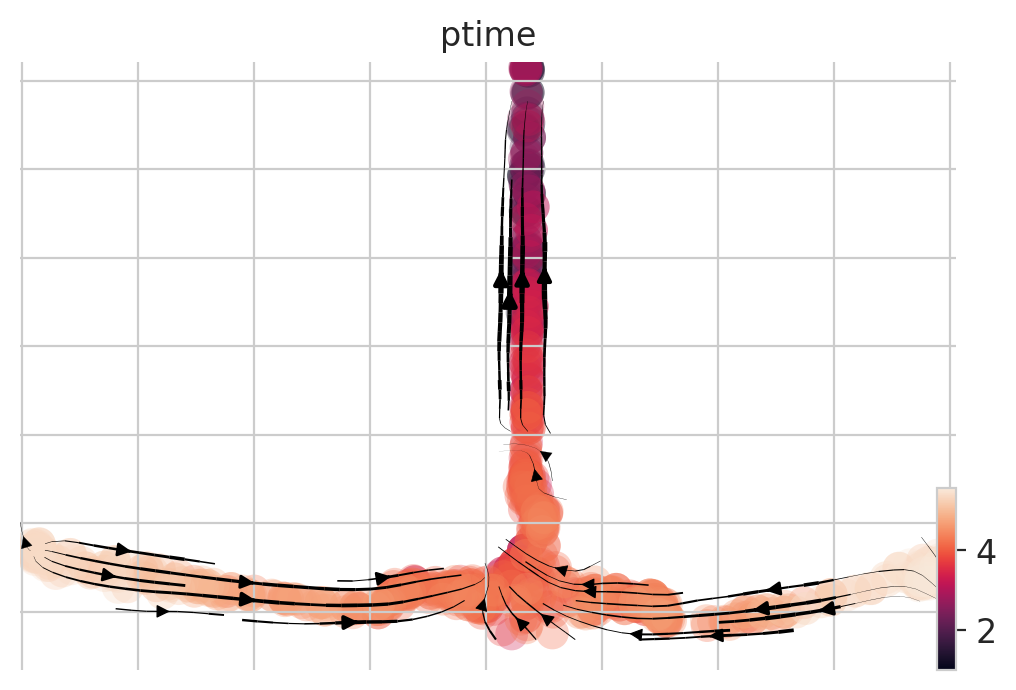

In [275]:
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis='dimred',color = "ptime")

In [280]:
ds_velovi = adata.layers["velocity"]
import scipy
corr1 = scipy.stats.spearmanr(velocity_gt.todense(), ds_velovi)
corr1 = np.diagonal(corr1.statistic[0:146,146:(146*2)])

In [282]:
corr1.mean()

0.10041636171614768

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/80 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_dimred', embedded velocity vectors (adata.obsm)


/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


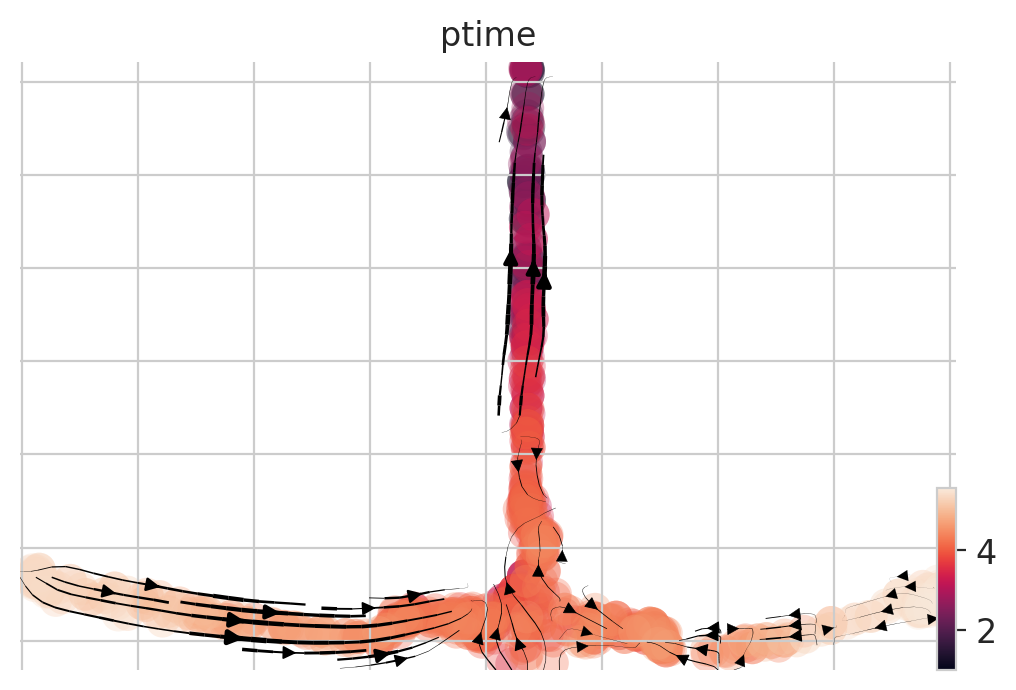

In [237]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis='dimred',color = 'ptime')

In [240]:
ds_velovi = adata.layers["velocity"]
import scipy
corr2 = scipy.stats.spearmanr(velocity_gt.todense(), ds_velovi)
corr2 = np.diagonal(corr2.statistic[0:146,146:(146*2)])

In [242]:
corr2.mean()

0.03316458444869248

In [243]:
adata.var["velocity_genes"] = True
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')

recovering dynamics (using 1/80 cores)


  0%|          | 0/146 [00:00<?, ?gene/s]

    finished (0:00:17) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [244]:
ds_velovi = adata.layers["velocity"]
import scipy
corr3 = scipy.stats.spearmanr(velocity_gt.todense(), ds_velovi)
corr3 = np.diagonal(corr3.statistic[0:146,146:(146*2)])

In [245]:
corr3.mean()

0.08687369303950528

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/80 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_dimred', embedded velocity vectors (adata.obsm)


/home/icb/weixu.wang/miniconda3/envs/RegVelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


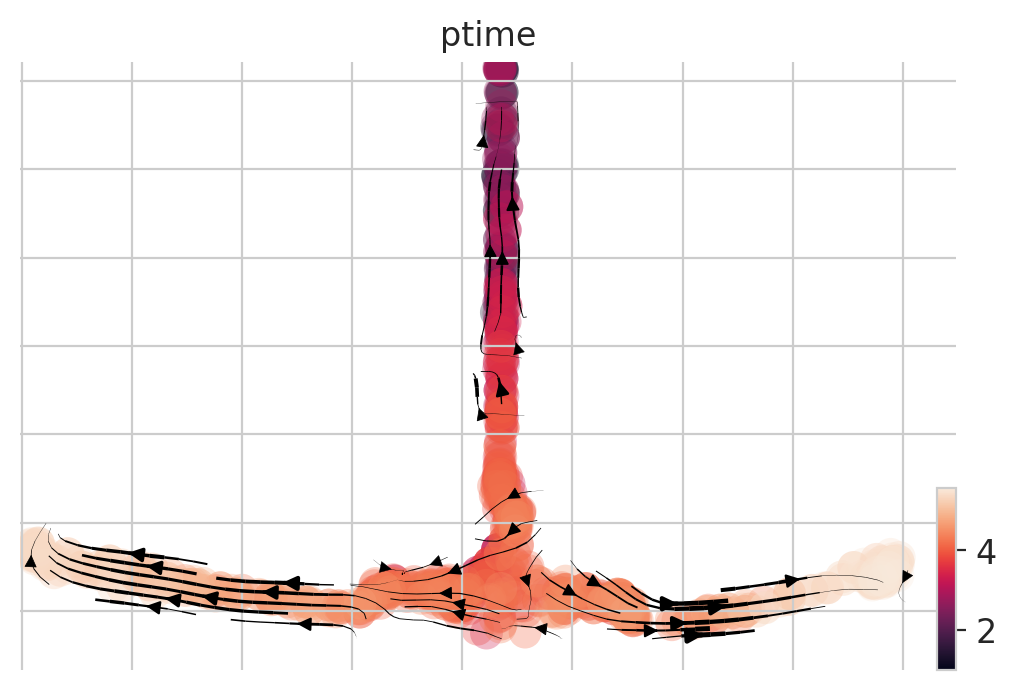

In [246]:
scv.tl.velocity(adata,mode = "deterministic")
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis='dimred',color = 'ptime')

In [247]:
ds_velovi = adata.layers["velocity"]
import scipy
corr4 = scipy.stats.spearmanr(velocity_gt.todense(), ds_velovi)
corr4 = np.diagonal(corr4.statistic[0:146,146:(146*2)])

In [248]:
corr4.mean()

0.06957197698133862

In [286]:
corr = pd.DataFrame(corr).assign(Model="RegVelo")
corr1 = pd.DataFrame(corr1).assign(Model="VeloVI")
corr2 = pd.DataFrame(corr2).assign(Model="Stochastic")
corr3 = pd.DataFrame(corr3).assign(Model="Dynamical")
corr4 = pd.DataFrame(corr4).assign(Model="Deterministic")

cdf = pd.concat([corr,corr1,corr2,corr3,corr4])    

In [287]:
mdf = pd.melt(cdf, id_vars=['Model'], var_name=['Number'])

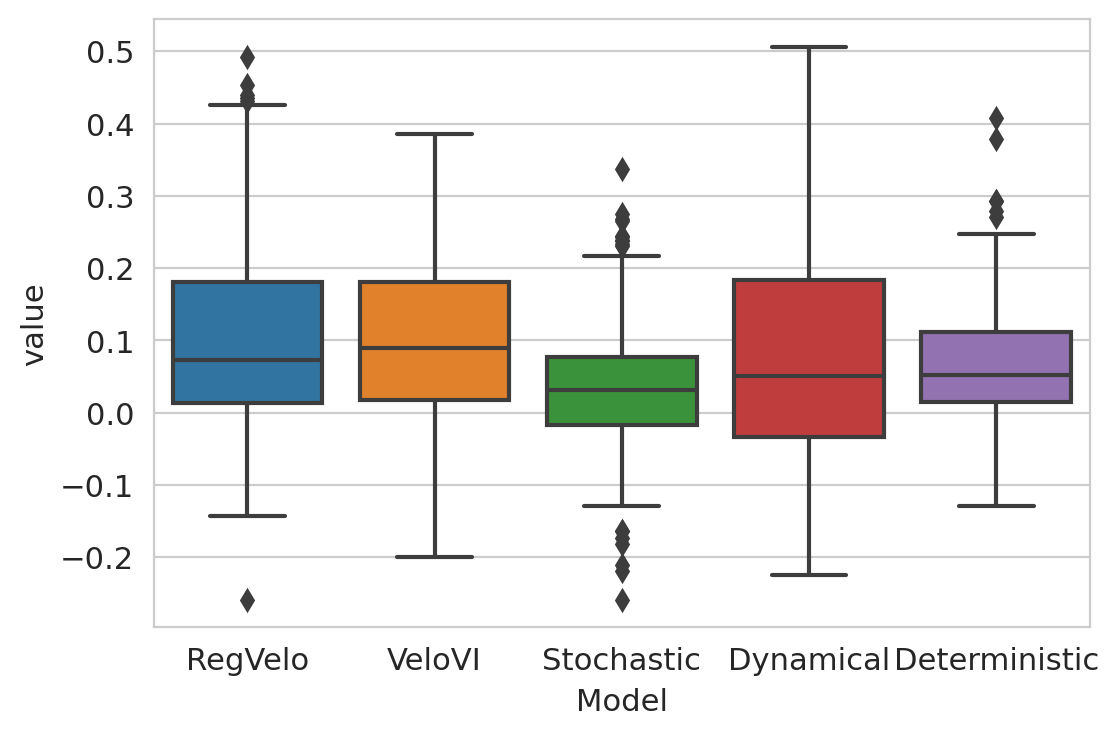

In [288]:
from matplotlib import pyplot as plt
import seaborn as sns

ax = sns.boxplot(x="Model", y="value", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

In [293]:
corr[0].mean()

0.1085889053636463

In [294]:
corr1[0].mean()

0.10041636171614768